In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/sample_data/Housing.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

545

In [3]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'
# But in order to fit a regression Line, we would need numerical values 

num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map (v1) :
 return v1.map({'yes' : 1, "no": 0})
# Applying the function to the housing List
df[num_vars_b] = df[num_vars_b] . apply(binary_map)
#Check the housing dataframe now
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
df = df.drop(labels = "furnishingstatus", axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [5]:
z= df.iloc[:,0:12]  # get input values from first column 
#y = df.iloc[:, 0]  # get output values from second column 
m = len(z) # Number of training examples 
print('Z = ', z[:10]) # Show only first 5 records 
#print('y = ', y[:10]) 
print('m = ', m) 
z.shape

Z =        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000   7420         4          2        3         1          0   
1  12250000   8960         4          4        4         1          0   
2  12250000   9960         3          2        2         1          0   
3  12215000   7500         4          2        2         1          0   
4  11410000   7420         4          1        2         1          1   
5  10850000   7500         3          3        1         1          0   
6  10150000   8580         4          3        4         1          0   
7  10150000  16200         5          3        2         1          0   
8   9870000   8100         4          1        2         1          1   
9   9800000   5750         3          2        4         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  
0         0                0                1        2         1  
1         0                0                1        3   

(545, 12)

In [6]:
# using the train test split function
z_train, z_test = train_test_split(z, random_state = 0, train_size = .8)

print(f"No. of training examples: {z_train.shape[0]}")
print(f"No. of testing examples: {z_test.shape[0]}")

#print(f"No. of training examples: {y_train.shape[0]}")
#print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 436
No. of testing examples: 109


In [7]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()

scaler = MinMaxScaler()
z_train= scaler.fit_transform(z_train)
z_test= scaler.fit_transform(z_test)
print('z_train = ', z_train[:10]) # Show only first 5 records 
print('z_test = ', z_test[:10]) 

z_train =  [[0.         0.12419939 0.2        0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.08181818 0.15065441 0.2        0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.0969697  0.08382066 0.2        0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.07272727 0.12280702 0.2        0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.23939394 0.55861877 0.4        0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.23030303 0.14842662 0.4        0.         0.33333333 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.24545455 0.13951546 0.4        0.         0.33333333 1.
  0.         0.         0.         0.         0.33333333 1.        ]
 [0.3030303  0.55444166 0.6        0.5        0.33333333 1.
  1.         0.         0.

In [8]:
X_train= z_train[:,1:12]  # get input values from first column 
y_train =z_train[:, 0]  # get output values from second column 
X_test= z_test[:,1:12]  # get input values from first column 
y_test =z_test[:, 0]  # get output values from second column 

print('X = ', X_train[:10]) # Show only first 5 records 
print('y ', y_train[:10]) 
X_train.shape

X =  [[0.12419939 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.14842662 0.4        0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.13951546 0.4        0.         0.33333333 1.         0.
  0.         0.         0.         0.33333333 1.        ]
 [0.55444166 0.6        0.5        0.33333333 1.         1.
  0.         0.         0.         0.66666667 0.        ]
 [0.12559176 0.2        0.         0.         1.   

(436, 11)

In [9]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((436, 1)) 
X_2 = np.ones((109,1))

In [10]:
# Using reshape function convert X 1D array to 2D array of dimension 100X1 
X_1 = X_train.reshape(436,11) 
X_3 = X_test.reshape(109,11)
X_1[:10] 
X_3[:10]

array([[0.2034632 , 0.5       , 0.        , 0.33333333, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.        ],
       [0.69004329, 0.5       , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.66666667,
        1.        ],
       [0.15670996, 0.75      , 0.        , 0.33333333, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [1.        , 0.25      , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.33333333,
        0.        ],
       [0.17402597, 0.75      , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.40692641, 0.5       , 0.33333333, 0.66666667, 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.19047619, 0.5       , 0.        , 0.        , 1.

In [11]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X_train = np.hstack((X_0, X_1)) 
X_test = np.hstack((X_2, X_3))

In [12]:
theta = np.zeros(12) 
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [14]:
# Lets compute the cost for theta values 
cost = compute_cost(X_train, y_train, theta) 
print('The cost for given values of theta_0 =',cost) 

The cost for given values of theta_0 = 0.03841234407170959


In [15]:
def gradient_descent(X, X1, y, y1, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  ef gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  cost_history = np.zeros(iterations) 
  cost_history2 = np.zeros(iterations) 
  lmbda_value = 1;


  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (1 /m) * (X.transpose().dot(errors) + lmbda_value *theta) ; 
    theta= theta - alpha*sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)
    cost_history2[i] = compute_cost(X1, y1, theta) 
 
  return theta, cost_history , cost_history2

In [16]:
theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] 
iterations = 100; 
alpha =0.01;

In [17]:
theta, cost_history_a, cost_history_a2 = gradient_descent(X_train, X_test, y_train, y_test, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1],cost_history_a2[-1]) 

Final value of theta = [0.08544417 0.02795822 0.03935654 0.02535429 0.0354823  0.07978388
 0.02421853 0.03518121 0.00660238 0.04653294 0.03092654 0.03501885]
cost_history = 0.006845848184579228 0.0018557576759905732


Text(0.5, 1.0, 'Convergence of gradient descent')

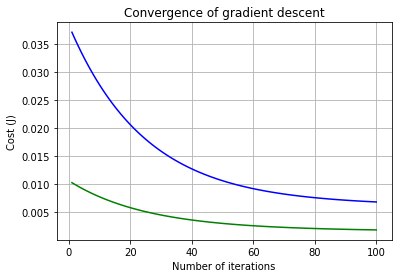

In [18]:
plt.plot(range(1, iterations + 1),cost_history_a, color='blue') 
plt.plot(range(1, iterations + 1),cost_history_a2, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 